## Importing all necessary packages

In [1]:
import pandas as pd
import glob
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')

# Data Perprocessing Starts

## Loading the data and processed data for label 

In [3]:
all_folders = [x[0] for x in os.walk(r"D:\Assignments\DS\Annoy\Uni\Stress-Predict-Dataset-main\Raw_data")]

#only selecting the necessary folders which contains subject s01 to subject s35 data
all_folders = all_folders[1:]

pre = pd.read_csv(r'D:\Assignments\DS\Annoy\Uni\Stress-Predict-Dataset-main\Processed_data\Improved_All_Combined_hr_rsp_binary.csv')
pre.rename({'Time(sec)':'merger'},axis = 1,inplace = True)

In [9]:
count = 0
final_data = pd.DataFrame()
testing_data = pd.DataFrame()

for i in all_folders:

    files = []
    for j in glob.glob(i + "/*.csv"):
        files.append(j)
        
        
    #ACC,BVP,EDA,HR,IBI,TEMP, all attributes are loaded which are in individual CSV's   
    acc = pd.read_csv(files[0])
    bvp = pd.read_csv(files[1])
    eda = pd.read_csv(files[2])
    hr = pd.read_csv(files[3])
    ibi = pd.read_csv(files[4])
    temp = pd.read_csv(files[6])
    
    acc['merger'] = 0
    bvp['merger'] = 0
    hr['merger'] = 0
    eda['merger'] = 0
    ibi['merger'] = 0
    temp['merger'] = 0
    
    #Getting the time variable from the column name 
    acc['merger'] = int(float(acc.columns[0]))
    bvp['merger'] = int(float(bvp.columns[0]))
    eda['merger'] = int(float(eda.columns[0]))
    hr['merger'] = int(float(hr.columns[0]))
    ibi['merger'] = int(float(ibi.columns[0]))
    temp['merger'] = int(float(temp.columns[0]))
    
    acc.reset_index(inplace = True)
    bvp.reset_index(inplace = True)
    hr.reset_index(inplace = True)
    ibi.reset_index(inplace = True)
    temp.reset_index(inplace = True)
    eda.reset_index(inplace = True)
    
    #Getting each time recorded
    acc['merger'] = acc['merger']+acc['index']
    bvp['merger'] = bvp['merger']+bvp['index']
    ibi['merger'] = ibi['merger']+ibi['index']
    eda['merger'] = eda['merger']+eda['index']
    temp['merger'] = temp['merger']+temp['index']
    hr['merger'] = hr['merger']+hr['index']
    
    acc.drop('index',axis = 1,inplace = True)
    bvp.drop('index',axis = 1,inplace = True)
    hr.drop('index',axis = 1,inplace = True)
    ibi.drop('index',axis = 1,inplace = True)
    temp.drop('index',axis = 1,inplace = True)
    eda.drop('index',axis = 1,inplace = True)
    
    acc.rename({acc.columns[0]:'X',acc.columns[1]:'Y',acc.columns[2]:'Z'},axis = 1,inplace = True)
    bvp.rename({bvp.columns[0]:'bvp'},axis = 1,inplace = True)
    hr.rename({hr.columns[0]:'hr'},axis = 1,inplace = True)
    ibi.rename({ibi.columns[0]:'IBI0'},axis = 1,inplace = True)
    temp.rename({temp.columns[0]:'temp'},axis = 1,inplace = True)
    eda.rename({eda.columns[0]:'eda'},axis = 1,inplace = True)
    
    #Merging the data by outer in order to not have any data leakage/ 
    final = acc.merge(bvp,on = 'merger',how = 'outer').merge(hr,on = 'merger',how = 'outer').merge(ibi,on = 'merger',how = 'outer').merge(temp,on = 'merger',how = 'outer').merge(eda,on = 'merger',how = 'outer')
    
    def dt(x):
        return datetime.datetime.fromtimestamp(x)

    final['datetime'] = final['merger'].apply(dt)
    
    final.reset_index(inplace = True, drop = True)
    
    #Not removing any null values
    final.fillna(method='ffill',inplace = True)
    final.fillna(method='bfill',inplace = True)
    
    #Added Participants ID as specified in the feedback
    final = final.merge(pre[['merger','Participant','Label']],on = 'merger',how = 'inner')
    
    final_data = final_data.append(final)
    final_data.reset_index(inplace = True, drop = True)

    count = count + 1
    print('Subject', count,'is done')

Subject 1 is done
Subject 2 is done
Subject 3 is done
Subject 4 is done
Subject 5 is done
Subject 6 is done
Subject 7 is done
Subject 8 is done
Subject 9 is done
Subject 10 is done
Subject 11 is done
Subject 12 is done
Subject 13 is done
Subject 14 is done
Subject 15 is done
Subject 16 is done
Subject 17 is done
Subject 18 is done
Subject 19 is done
Subject 20 is done
Subject 21 is done
Subject 22 is done
Subject 23 is done
Subject 24 is done
Subject 25 is done
Subject 26 is done
Subject 27 is done
Subject 28 is done
Subject 29 is done
Subject 30 is done
Subject 31 is done
Subject 32 is done
Subject 33 is done
Subject 34 is done
Subject 35 is done


In [10]:
final_data.to_csv('preprocessed.csv',index = False)

# Data Preprocessing Ends

In [2]:
import pandas as pd
import glob
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('preprocessed.csv')

In [4]:
train.head()

,X,Y,Z,merger,bvp,hr,IBI0,IBI,temp,eda,datetime,Participant,Label
0,-17.0,17.0,59.0,1644227583,-12.38,69.52,2856.46875,1.21875,28.47,0.231907,2022-02-07 09:53:03,2,0
1,-16.0,17.0,59.0,1644227584,-7.21,68.98,2856.46875,1.21875,28.47,0.233188,2022-02-07 09:53:04,2,0
2,-16.0,17.0,59.0,1644227585,-1.68,68.42,2856.46875,1.21875,28.47,0.233188,2022-02-07 09:53:05,2,0
3,-15.0,17.0,59.0,1644227586,3.98,67.92,2856.46875,1.21875,28.45,0.235751,2022-02-07 09:53:06,2,0
4,-15.0,17.0,59.0,1644227587,9.56,67.45,2856.46875,1.21875,28.45,0.230626,2022-02-07 09:53:07,2,0


In [5]:
#check null vlaues and datatypes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509026 entries, 0 to 509025
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   X            509026 non-null  float64
 1   Y            509026 non-null  float64
 2   Z            509026 non-null  float64
 3   merger       509026 non-null  int64  
 4   bvp          509026 non-null  float64
 5   hr           509026 non-null  float64
 6   IBI0         509026 non-null  float64
 7    IBI         509026 non-null  float64
 8   temp         509026 non-null  float64
 9   eda          509026 non-null  float64
 10  datetime     509026 non-null  object 
 11  Participant  509026 non-null  int64  
 12  Label        509026 non-null  int64  
dtypes: float64(9), int64(3), object(1)
memory usage: 50.5+ MB


In [6]:
#No dropping of duplicates
train.duplicated().sum()

0

In [7]:
train.describe()

,X,Y,Z,merger,bvp,hr,IBI0,IBI,temp,eda,Participant,Label
count,509026.000000,509026.000000,509026.000000,5.090260e+05,509026.000000,509026.000000,509026.000000,509026.000000,509026.000000,509026.000000,509026.000000,509026.000000
mean,-27.976956,-2.775526,43.637335,1.645815e+09,0.001795,78.752242,2965.765672,0.811723,30.443887,0.767515,20.769723,0.321235
std,23.865424,15.383378,25.027782,8.079315e+05,74.514267,13.722715,697.196656,0.165644,2.745743,1.148043,9.875776,0.466951
min,-128.000000,-111.000000,-95.000000,1.644228e+09,-1382.970000,1.000000,11.843750,0.312500,4.000000,0.000000,2.000000,0.000000
25%,-46.000000,-11.000000,35.000000,1.645436e+09,-14.340000,68.830000,3011.609375,0.703125,28.610000,0.167854,12.000000,0.000000
50%,-28.000000,-3.000000,54.000000,1.646052e+09,1.250000,75.850000,3176.156250,0.796875,30.550000,0.303657,22.000000,0.000000
75%,-15.000000,4.000000,60.000000,1.646660e+09,16.090000,86.000000,3299.843750,0.890625,32.150000,0.892142,30.000000,1.000000
max,93.000000,121.000000,127.000000,1.646842e+09,1822.090000,146.780000,3542.312499,1.703125,36.390000,9.366458,35.000000,1.000000


In [8]:
#Checking correlation of the variables
train.corr()

,X,Y,Z,merger,bvp,hr,IBI0,IBI,temp,eda,Participant,Label
X,1.000000,0.205991,0.501329,0.040102,-0.002306,0.238227,-0.023371,-0.117191,-0.321137,-0.079048,0.031079,0.006120
Y,0.205991,1.000000,-0.037399,0.029540,0.002599,0.002871,-0.111047,-0.101241,-0.220160,0.046431,0.036805,-0.019375
Z,0.501329,-0.037399,1.000000,-0.057908,-0.006641,0.006789,-0.003716,0.060750,-0.011688,0.011088,-0.064052,0.015659
merger,0.040102,0.029540,-0.057908,1.000000,0.000094,0.023869,0.081233,-0.185598,-0.200882,-0.271811,0.985076,0.008176
bvp,-0.002306,0.002599,-0.006641,0.000094,1.000000,-0.003134,-0.000222,-0.000758,-0.001129,0.001087,-0.000130,-0.002318
hr,0.238227,0.002871,0.006789,0.023869,-0.003134,1.000000,-0.009089,-0.510197,-0.389271,0.069115,0.014241,0.022824
IBI0,-0.023371,-0.111047,-0.003716,0.081233,-0.000222,-0.009089,1.000000,0.084767,-0.044237,0.050873,0.111578,0.023528
IBI,-0.117191,-0.101241,0.060750,-0.185598,-0.000758,-0.510197,0.084767,1.000000,0.337163,0.046399,-0.158702,-0.007679
temp,-0.321137,-0.220160,-0.011688,-0.200882,-0.001129,-0.389271,-0.044237,0.337163,1.000000,0.119258,-0.194574,-0.005483
eda,-0.079048,0.046431,0.011088,-0.271811,0.001087,0.069115,0.050873,0.046399,0.119258,1.000000,-0.306582,0.007125


<AxesSubplot:>

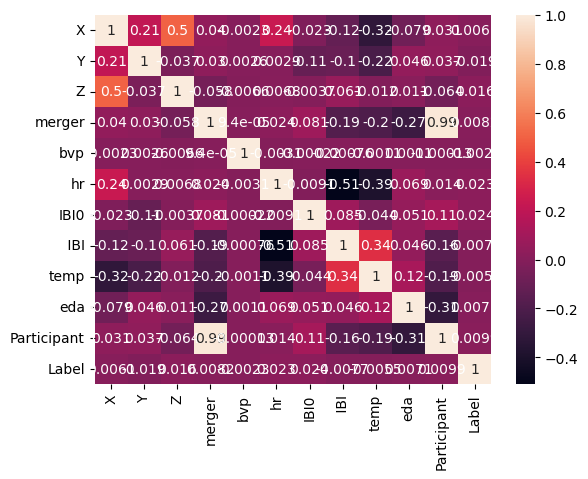

In [9]:
#CHecking heatmap for correlation visulization
sns.heatmap(train.corr(),annot = True)

array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'Z'}>],
       [<AxesSubplot:title={'center':'merger'}>,
        <AxesSubplot:title={'center':'bvp'}>,
        <AxesSubplot:title={'center':'hr'}>],
       [<AxesSubplot:title={'center':'IBI0'}>,
        <AxesSubplot:title={'center':' IBI'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'eda'}>,
        <AxesSubplot:title={'center':'Participant'}>,
        <AxesSubplot:title={'center':'Label'}>]], dtype=object)

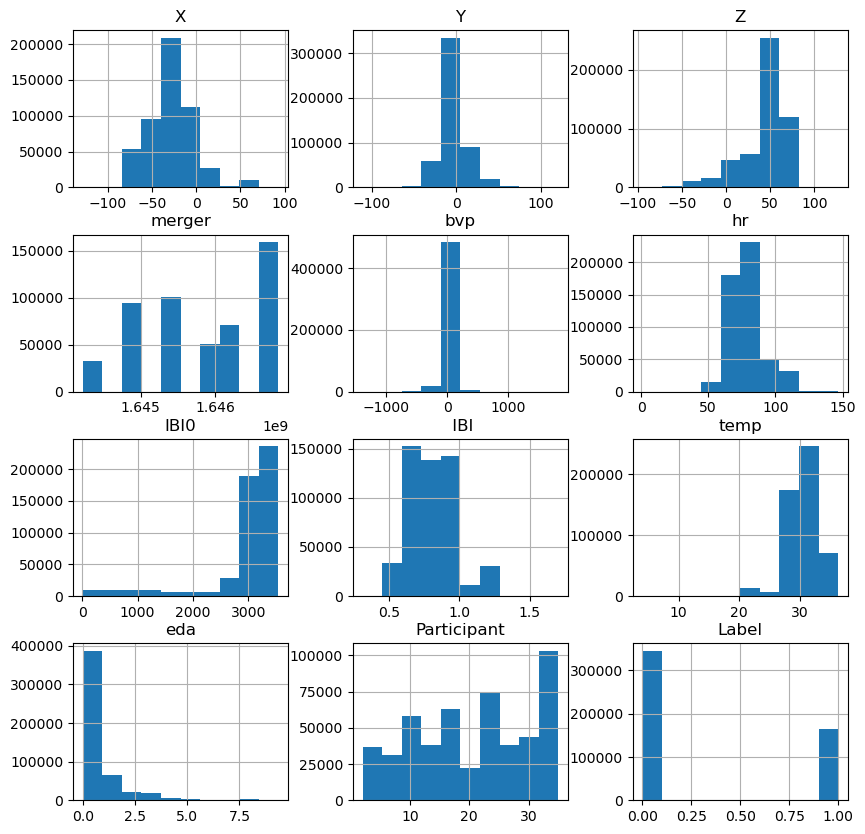

In [10]:
#checking skewed data for normal distribution
train.hist(figsize = (10,10))

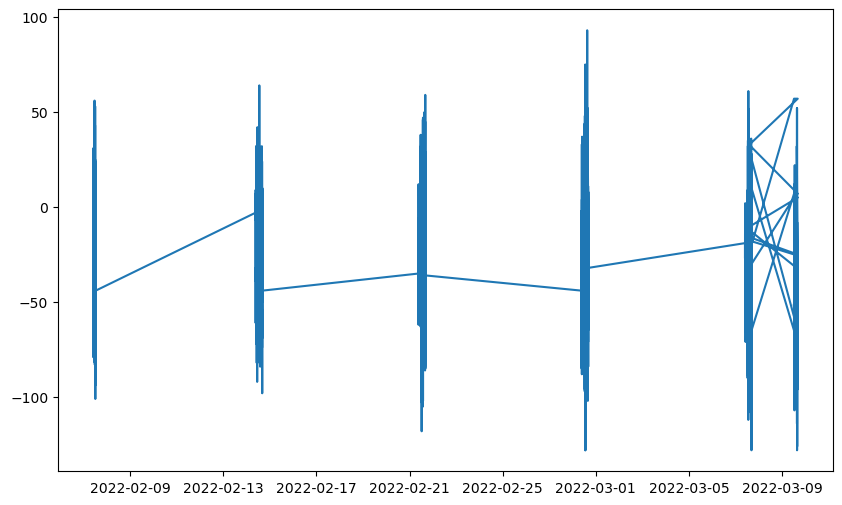

In [19]:
#Time Series plot of each attributes explains us how the data is recorded, explain the data and how it is recorded
plt.figure(figsize=(10, 6))

# Plot the timeseries data
print(plt.plot(final_data.datetime, final_data.X))

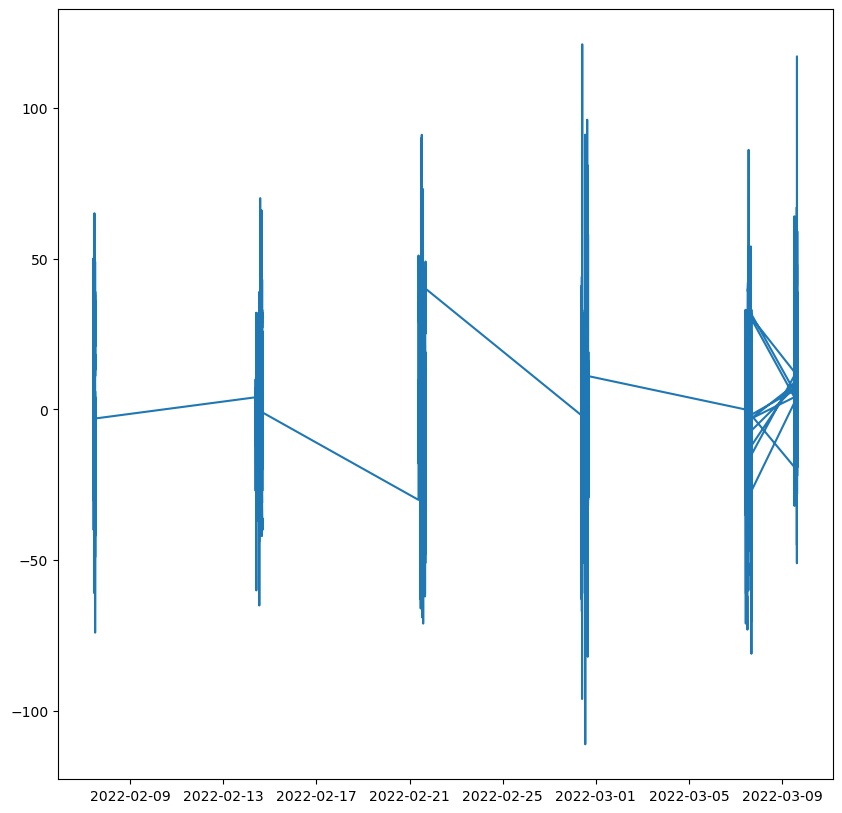

In [20]:
plt.figure(figsize=(10, 10))

print(plt.plot(final_data.datetime, final_data.Y))

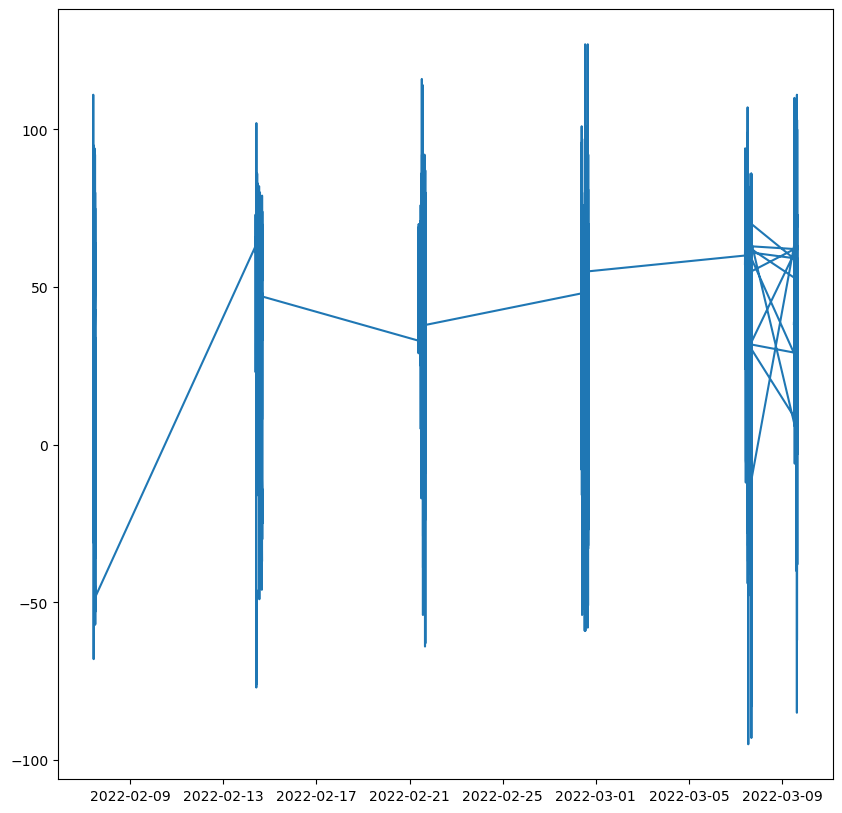

In [21]:
plt.figure(figsize=(10, 10))

print(plt.plot(final_data.datetime, final_data.Z))

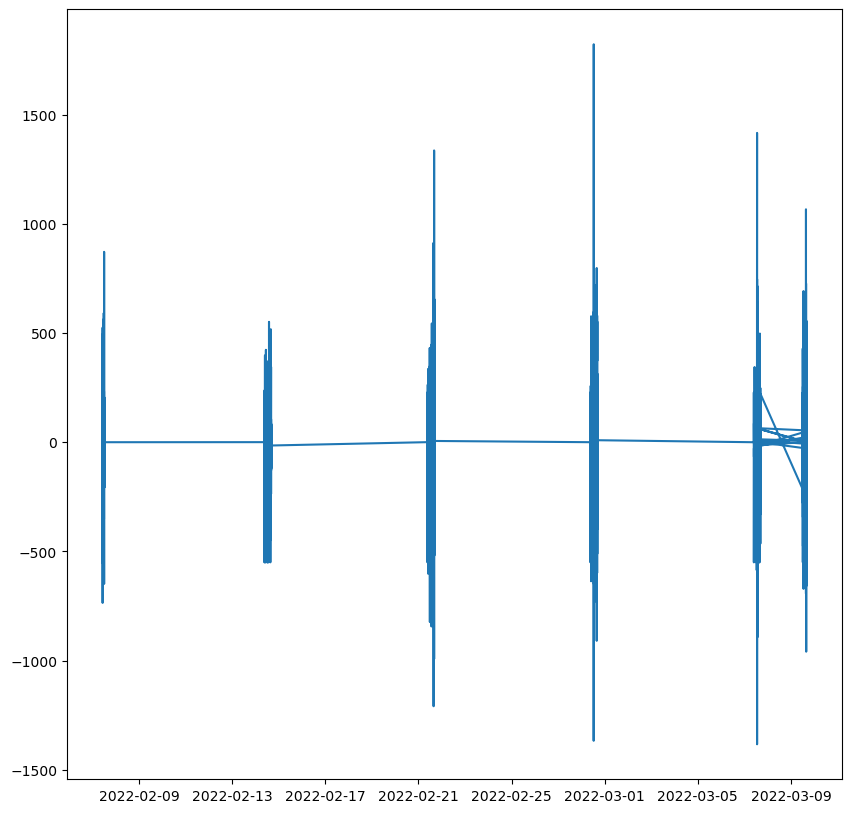

In [22]:
plt.figure(figsize=(10, 10))

print(plt.plot(final_data.datetime, final_data.bvp))

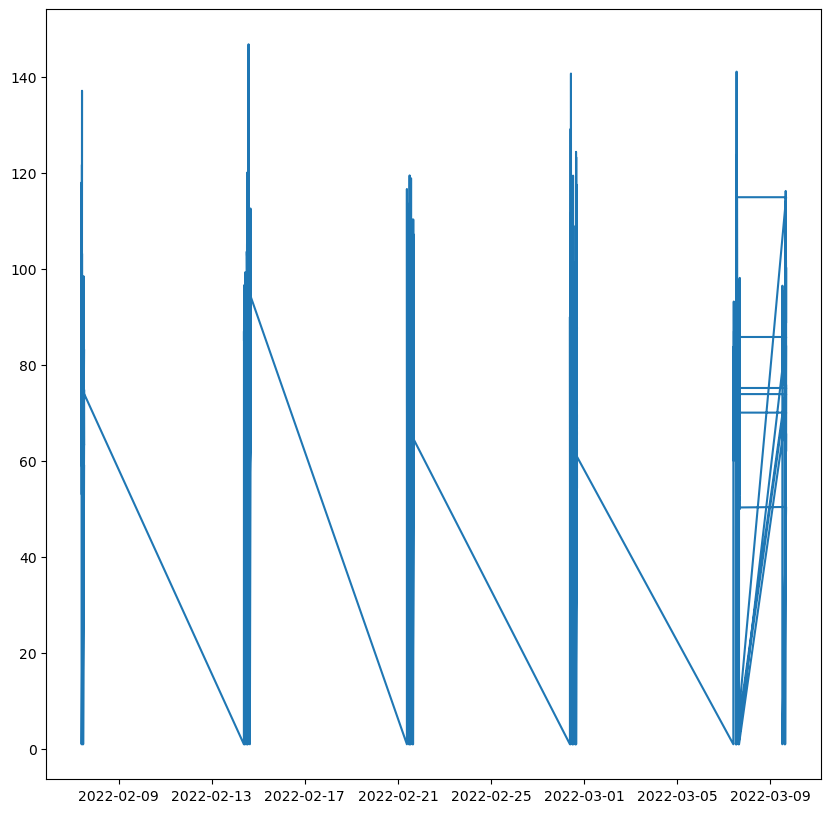

In [23]:
plt.figure(figsize=(10, 10))

print(plt.plot(final_data.datetime, final_data.hr))

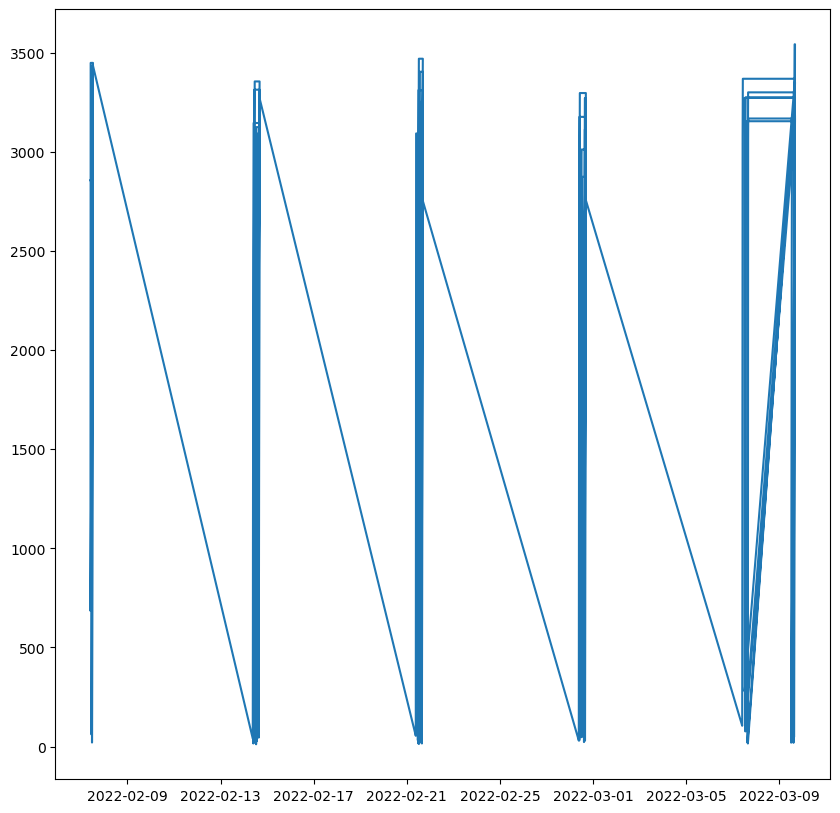

In [25]:
plt.figure(figsize=(10, 10))

print(plt.plot(final_data.datetime, final_data.IBI0))

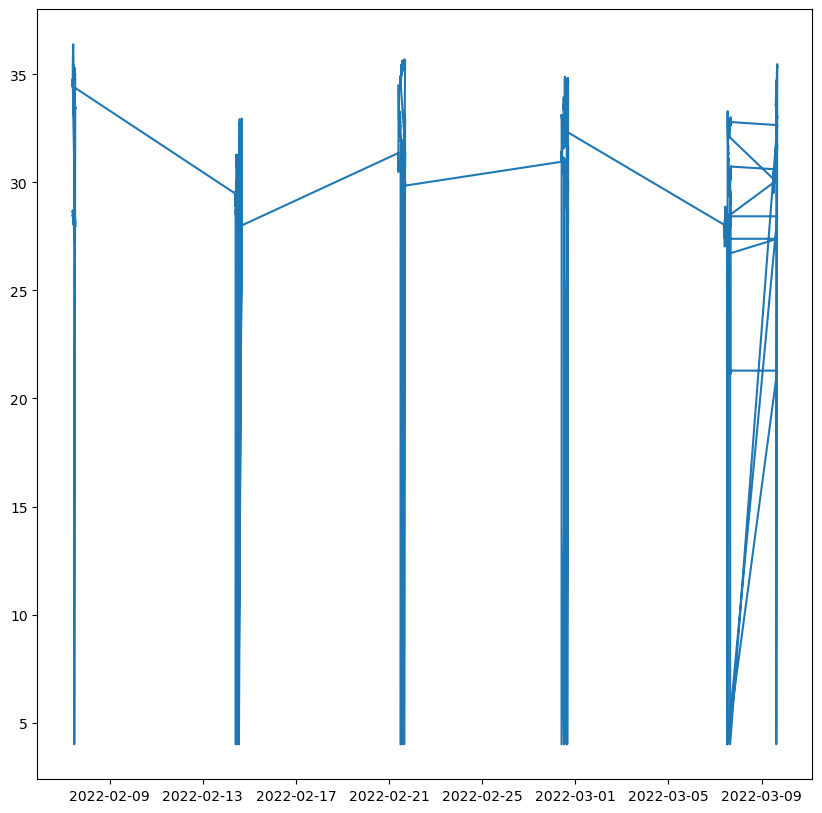

In [28]:
plt.figure(figsize=(10, 10))

print(plt.plot(final_data.datetime, final_data.temp))

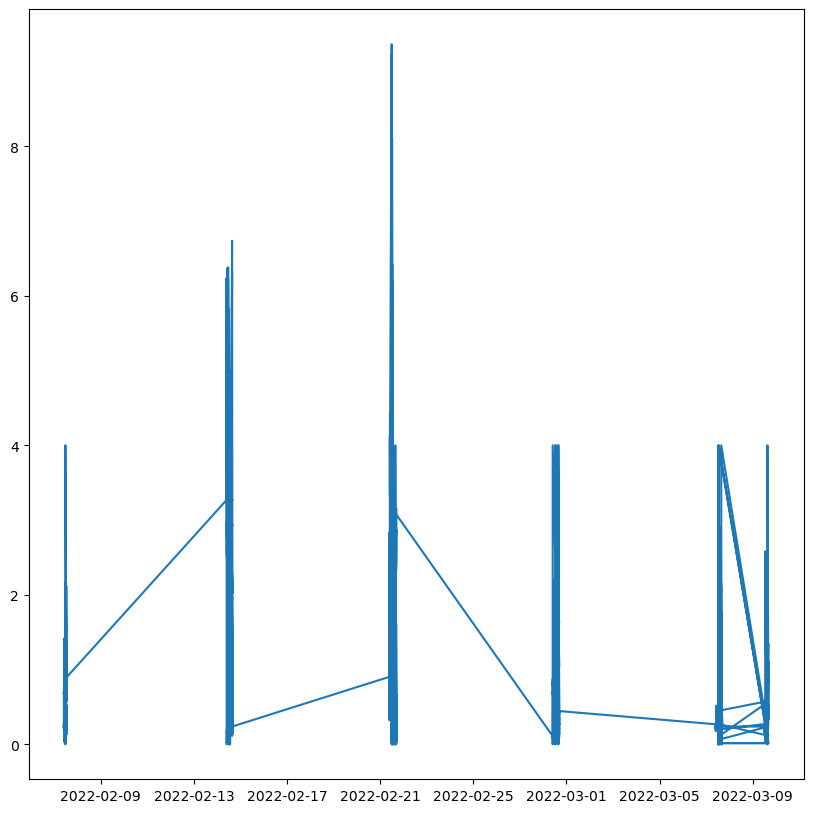

In [31]:
plt.figure(figsize=(10, 10))

print(plt.plot(final_data.datetime, final_data.eda))

In [32]:
#Checking the data imbalance
train['Label'].value_counts()

0    345509
1    163517
Name: Label, dtype: int64

<AxesSubplot:xlabel='Label', ylabel='count'>

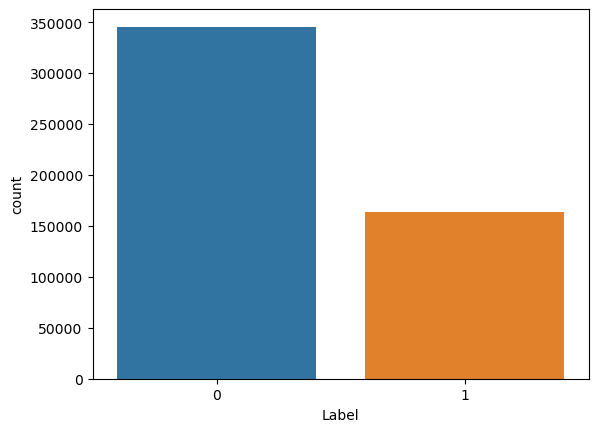

In [33]:
#checking the label counts
sns.countplot(train['Label'])

# Resampling

In [35]:
pip install imblearn

     -------------------------------------- 235.6/235.6 kB 7.3 MB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [11]:
#Upsampling the data
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

df_A = train[train['Label'] == 0]
df_B = train[train['Label'] == 1]

X = train.drop({'Label','datetime'},axis = 1)
Y = train['Label']   
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=5)

In [12]:
print("Before Upsampling 1's:- ",df_B.shape[0])

sm = SMOTE()   
dependent, label = sm.fit_resample(X_train, y_train.ravel())
print("After UpSampling 1's:- {}".format(sum(label==1)))

Before Upsampling 1's:-  163517
After UpSampling 1's:- 241739


In [13]:
train_final = dependent.copy()
train_final['Label'] = label

In [14]:
train_final['Label'].value_counts()

0    241739
1    241739
Name: Label, dtype: int64

<AxesSubplot:xlabel='Label', ylabel='count'>

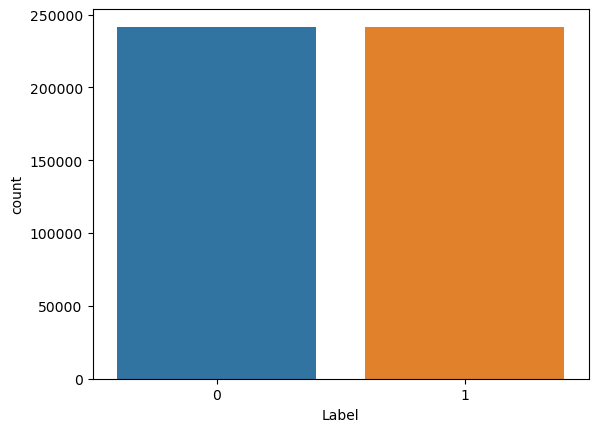

In [15]:
#Balanced data countplot
sns.countplot(train_final['Label'])

# train test split 

In [16]:
train_final.shape

(483478, 12)

In [86]:
from sklearn.utils import shuffle
train_final = shuffle(train_final)

In [87]:
#splitting the data into training and testing 80% and 20% and not using sklearn to split because 
#it will destroy the timeseries dataset
split_index = int(train_final.shape[0] * 0.8)  # Use 80% for training

# Split the data into training and testing sets
train_data = train_final.iloc[:split_index]
test_data = train_final.iloc[split_index:]

# Extract X and y from the training and testing sets
X_train = train_data.drop({'Label','merger','Participant'}, axis=1)
y_train = train_data['Label']
X_test = test_data.drop({'Label','merger','Participant'}, axis=1)
y_test = test_data['Label']

# Output the shapes of the split data
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(386782, 9) (386782,) (96696, 9) (96696,)


# Normilization

In [90]:
from sklearn.preprocessing import StandardScaler

# assigning to different variable
X_train_features = X_train
X_test_features = X_test

# StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_features)

X_test_scaled = scaler.transform(X_test_features)

# Model building

# Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train_scaled, y_train)
y_pred1 = clf.predict(X_test_scaled)

In [92]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.51      0.50      0.51     48417
           1       0.51      0.52      0.52     48279

    accuracy                           0.51     96696
   macro avg       0.51      0.51      0.51     96696
weighted avg       0.51      0.51      0.51     96696



In [93]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred1)

array([[24446, 23971],
       [23082, 25197]], dtype=int64)

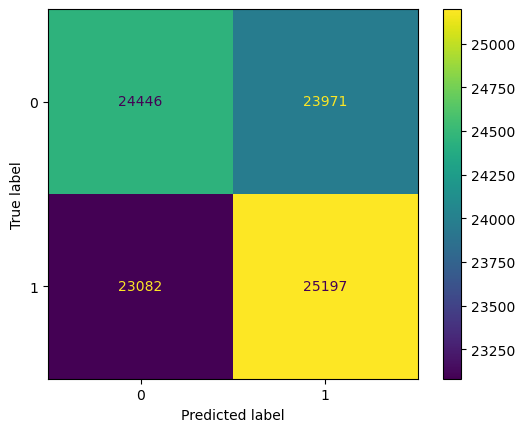

In [94]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

# Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier

clf1 = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train_scaled, y_train)
y_pred2 = clf1.predict(X_test_scaled)

In [96]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.63      0.18      0.29     48417
           1       0.52      0.89      0.66     48279

    accuracy                           0.54     96696
   macro avg       0.57      0.54      0.47     96696
weighted avg       0.57      0.54      0.47     96696



In [97]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred2)

array([[ 8952, 39465],
       [ 5329, 42950]], dtype=int64)

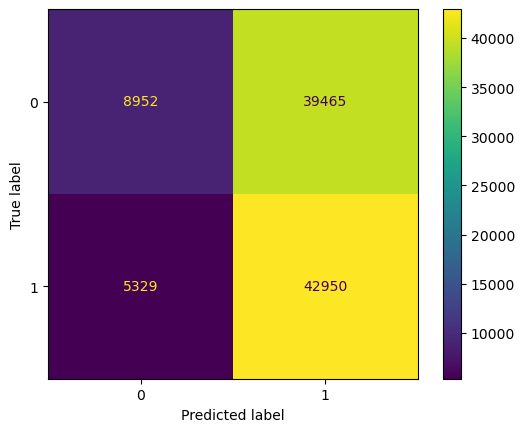

In [98]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred2)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

# Naive bayes

In [99]:
from sklearn.naive_bayes import GaussianNB

clf2 = GaussianNB().fit(X_train_scaled, y_train)
y_pred3 = clf2.predict(X_test_scaled)

In [100]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.52      0.26      0.34     48417
           1       0.51      0.76      0.61     48279

    accuracy                           0.51     96696
   macro avg       0.51      0.51      0.48     96696
weighted avg       0.51      0.51      0.48     96696



In [101]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred3)

array([[12397, 36020],
       [11472, 36807]], dtype=int64)

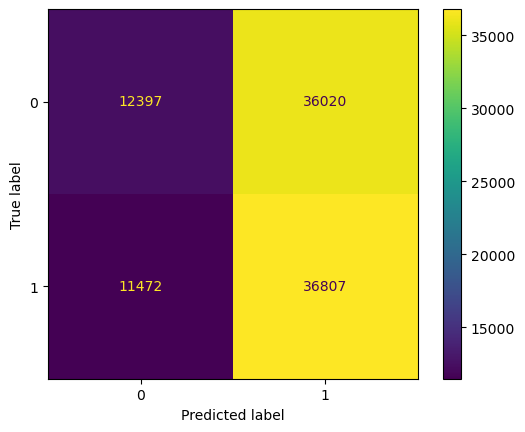

In [102]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred3)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

# Gradient Boosting

In [103]:
from sklearn.ensemble import GradientBoostingClassifier

clf3 = GradientBoostingClassifier().fit(X_train_scaled, y_train)
y_pred4 = clf3.predict(X_test_scaled)

In [104]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.63      0.59      0.61     48417
           1       0.61      0.65      0.63     48279

    accuracy                           0.62     96696
   macro avg       0.62      0.62      0.62     96696
weighted avg       0.62      0.62      0.62     96696



In [105]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred4)

array([[28447, 19970],
       [16971, 31308]], dtype=int64)

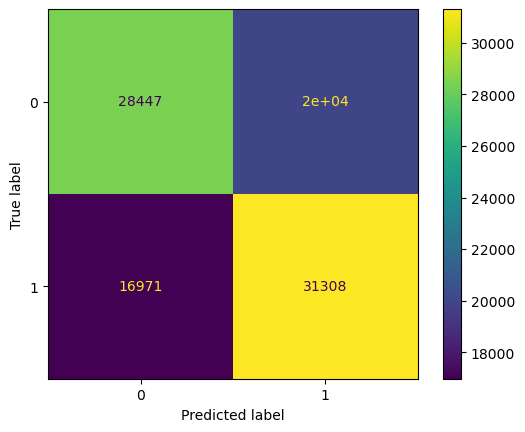

In [106]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred4)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

# ADAboost Classifier

In [107]:
from sklearn.ensemble import AdaBoostClassifier

In [108]:
clf4 = AdaBoostClassifier().fit(X_train_scaled, y_train)
y_pred5 = clf4.predict(X_test_scaled)

In [109]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.58      0.50      0.54     48417
           1       0.56      0.63      0.59     48279

    accuracy                           0.57     96696
   macro avg       0.57      0.57      0.56     96696
weighted avg       0.57      0.57      0.56     96696



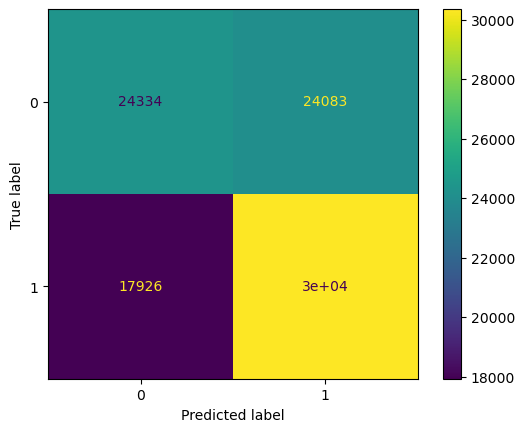

In [110]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred5)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()